In [1]:
import os
from typing import Dict, List, Tuple

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output

#https://www.kaggle.com/code/sarjit07/reinforcement-learning-using-q-table-frozenlake

In [92]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=False)

In [135]:
# Hyper-Parameters

total_episodes = 10000 # Total number of iterations or episodes of training.

# A higher value of epsilon encourages more exploration, while a lower value of epsilon favors exploitation.
epsilon = 0.9 # For epsilon-gready policy, Positive real number (0 < epsilon < 1)

max_steps = 100 # Maximum number of steps that agent can take in environment

lr_rate = 0.9 # Learning Rate of convergence to global minimum

# A high discount factor means that future rewards are highly valued, while a 
# low discount factor means that immediate rewards are given greater weight
gamma = 0.96 # Discount Factor, Positive real number (0 < gamma < 1)

In [136]:
Q = np.random.rand(env.observation_space.n, env.action_space.n)

In [137]:
def choose_action(state):
    """ 
    The choose_action() function used a Epsilon-Gready policy for Exploration and Exploitation.
    
    Exploration is done when uniform random number from 0 to 1 is less than epsilon value.
    Else, Maximum value of the state and action pair is taken which is Exploitation.

    Args:
        state (int): Gets the current state as parameter/

    Returns:
        int: Returns action to be taken in that state
    """
    action=0
    if np.random.uniform(0, 1) < epsilon: # Epsilon-Gready policy
        action = env.action_space.sample() # Exploration, Random action sample space
    else:
        ####### 如果Q表初始为0,需要加了随机扰动以更快的找到最优动作
#         random_values = Q[state] + np.random.rand(1,env.action_space.n) / 1000
        action = np.argmax(Q[state]) # Exploitation, Maximum value is taken from (State, Action)
    return action

In [138]:
def learn(state, state2, reward, action, done):
    """ 
    Updates the Q-table.
    Agent learn to find a optimal policy by using bellman optimality equation.

    Args:
        state (int): Current state
        state2 (int): Future state
        reward (int): Reward if rached to goal state
        action (int): action states
    """
    predict = Q[state, action]
    mask = (1 - done)
    target = reward + gamma * np.max(Q[state2, :]) * mask
    Q[state, action] = predict + lr_rate * (target - predict)

In [139]:
# Start with Reinforment Learning
rewards = []
steps = []
for episode in range(total_episodes):
    state, _ = env.reset() # Resetting the environment
    t = 0
    
    total_reward = 0
    while t < max_steps:
#         env.render() # Rendering the frozen-lake environment

        action = choose_action(state)  # Taking action
        if epsilon < 0.1:
            epsilon = 0.1
        else:
            epsilon *= 0.99
        # Returns new_state, reward after taking a action, done (boolean) whether reached to goal or not, information
        state2, reward, done, truncated, _ = env.step(action)
        learn(state, state2, reward, action, done) # Agent learns Q-table policy

        state = state2 # Setting state to new state 

        t += 1
        total_reward += reward
        
        if done: # If goal state is reached then true and loop breaks
            break

#         time.sleep(0.1)
    rewards.append(total_reward)
    steps.append(t)

In [140]:
print(Q)

[[7.82757790e-001 8.15372698e-001 8.15372698e-001 7.82757790e-001]
 [7.82757790e-001 5.14055334e-018 8.49346560e-001 8.15372025e-001]
 [8.15372697e-001 8.84736000e-001 8.15372665e-001 8.49346560e-001]
 [8.49346560e-001 5.45933099e-002 7.74839735e-001 1.07705940e-001]
 [8.15372698e-001 8.49346560e-001 5.40704284e-257 7.82757790e-001]
 [6.48374209e-001 3.87243934e-003 9.65053624e-001 8.42752215e-001]
 [5.93325879e-010 9.21600000e-001 9.47903890e-008 8.49330933e-001]
 [3.68699919e-001 2.39442194e-001 5.74211405e-001 5.51126116e-001]
 [8.49346560e-001 9.48346076e-259 8.84736000e-001 8.15372698e-001]
 [8.49346560e-001 9.21600000e-001 9.21600000e-001 7.78481228e-240]
 [8.84736000e-001 9.60000000e-001 8.75007648e-039 8.84736000e-001]
 [9.06656711e-002 4.90192003e-001 4.07561382e-002 2.71699517e-001]
 [4.37090900e-001 3.40935066e-001 6.10739404e-001 9.23813868e-001]
 [6.80606552e-236 9.21600000e-001 9.60000000e-001 8.84736000e-001]
 [9.21600000e-001 9.60000000e-001 1.00000000e+000 9.21600000e-

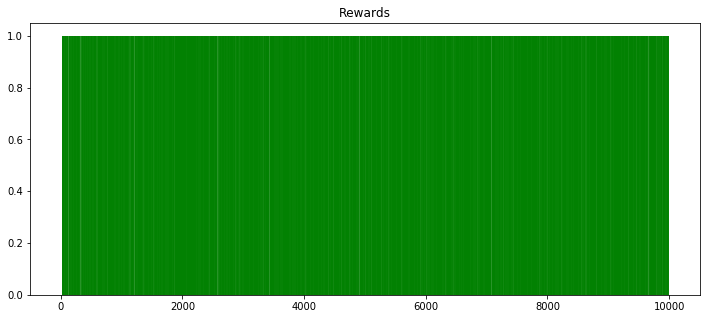

In [141]:
# 查看训练到后期的总奖励是否增加,说明训练情况是否正确
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards)), rewards, alpha=0.6, color='green', width=5)
plt.show()

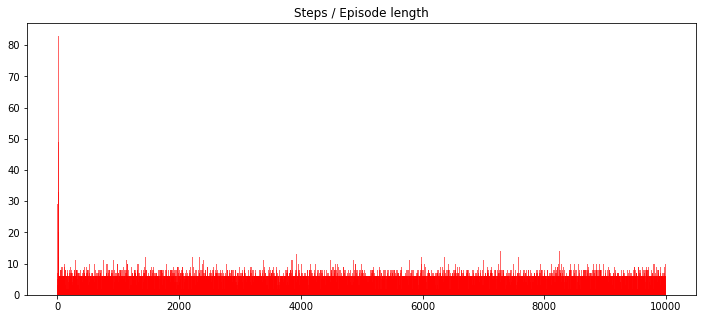

In [142]:
plt.figure(figsize=(12,5))
plt.title("Steps / Episode length")
plt.bar(torch.arange(len(steps)), steps, alpha=0.6, color='red', width=5)
plt.show()

In [25]:
import pickle      # For storing updated Q-table.
with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

In [143]:
# 观察效果
def choose_action2(state):
	action = np.argmax(Q[state, :])
	return action

def test():
    dvideo_env = gym.wrappers.RecordVideo(env, video_folder='.')
    state, _ = dvideo_env.reset(seed=3)
    done = False
    score = 0

    times = 0
    while not done:
        action = choose_action2(state)
        next_state, reward, done, truncated, _ = dvideo_env.step(action)

        state = next_state
        score += reward
        times+=1
    print("score: ", score)
    dvideo_env.close()
    
test()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/gymnasium/wrappers/record_video.py:88: UserWarning: WARN: Overwriting existing videos at /media/ubuntu/8b2f607c-117a-47e9-b82e-caf4eeeabeca/temp/test/reinforce_learning/rainbow folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  f"Overwriting existing videos at {self.video_folder} folder "


Moviepy - Building video /media/ubuntu/8b2f607c-117a-47e9-b82e-caf4eeeabeca/temp/test/reinforce_learning/rainbow/rl-video-episode-0.mp4.
Moviepy - Writing video /media/ubuntu/8b2f607c-117a-47e9-b82e-caf4eeeabeca/temp/test/reinforce_learning/rainbow/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /media/ubuntu/8b2f607c-117a-47e9-b82e-caf4eeeabeca/temp/test/reinforce_learning/rainbow/rl-video-episode-0.mp4
score:  1.0
